   bucket       pdf
0       1  0.645918
1       2  0.057519
2       3  0.027696
3       4  0.018174
4       5  0.012875
      bucket       pdf
2503   28862  0.000008
2504   31655  0.000008
2505   32908  0.000008
2506   37680  0.000008
2507   88721  0.000008


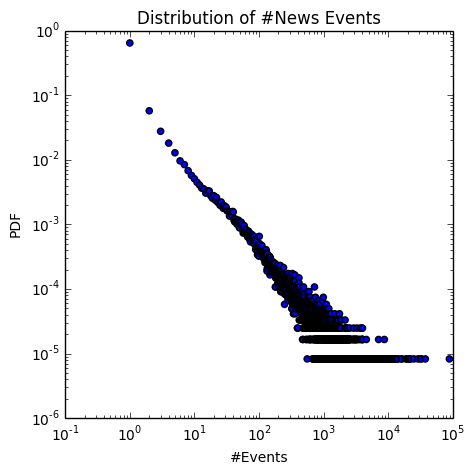

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline

# Distribution of the real data in `news_events_powerlaw.csv` (as an example):
    
df = pd.read_csv("./news_events_powerlaw.csv")
df["bucket"] = df["bucket"] + 1

f, ax = plt.subplots(figsize=(5, 5))
ax.set(xscale="log", yscale="log")
ax.scatter(df["bucket"], df["pdf"])

ax.set_title('Distribution of #News Events')
ax.set_xlabel('#Events')
ax.set_ylabel('PDF')
plt.savefig("./figures/scatter.png")

print df.head()
print df.tail()

In [4]:
# KS distance measure the "distance" of the real data and obtained model. 
def ksdistance(f1, f2):    
    cdf_f1 = [0.0]
    cdf_f2 = [0.0]
    for i in range(len(f1)):
        cdf_f1.append(cdf_f1[-1] + f1[i])
        cdf_f2.append(cdf_f2[-1] + f2[i])
    #print zip(cdf_f1, cdf_f2)
    tmplist = []
    for i in range(len(f1)+1):
        tmplist.append( float(abs(cdf_f1[i] - cdf_f2[i])) )
    return max(tmplist)

# The slope in double logarithm scale is the exponent (gamma) of the power-law. 
# The MLE estimator gives the following results
# K_min is the minimum "degree" where the power-law starts.
def bestgamma(degrees, thelist, kmin):
    gamma = -1
    est_tmp, est_n = 0, 0
    for j, p_j in zip(degrees[kmin:], thelist[kmin:]):
        f_j = p_j
        est_tmp +=  f_j * np.log( 1.0 * j / (degrees[kmin] - 0.5) )
        est_n += f_j 
    gamma = 1.0 + est_n / est_tmp
    
    #Eq. (2.5) in the paper "Power-law distributions in empirical data"
    C = 1.0 / sum([np.power(i,-gamma) for i in degrees[kmin:]]) 
    return gamma, C

# the theoritical distribution given all the parameters
def ideal(degrees, gammaval, C, kmin, m):
    tmp = np.zeros(len(degrees))
    for i, deg in zip(range(kmin,m,1), degrees[kmin:m]):
      tmp[i] = C * np.power(deg, -gammaval)
    return tmp

# set the lower bound
kmin = 2

gamma, C = bestgamma(df["bucket"], df["pdf"], kmin)
print "Fitting results:", gamma, C
f2 = ideal(df["bucket"], gamma, C, kmin, df.shape[0])
df['f2'] = pd.Series(f2, index=df.index)

# we just plot the part which has been used for fitting
df["pdf4fit"] = df["pdf"]
df["pdf4fit"][:kmin] = 0
df["pdf4fit"] = df["pdf4fit"] / (df["pdf4fit"].sum())
df.head()

print "KS Distance=", ksdistance(df["pdf4fit"], df["f2"])

Fitting results: 1.36899689577 0.568114114104
KS Distance= 0.158214173194


/Library/Python/2.7/site-packages/ipykernel/__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


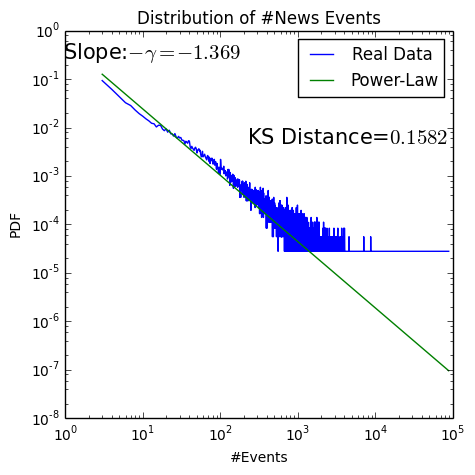

In [5]:
f, ax = plt.subplots(figsize=(5, 5))
ax.set(xscale="log", yscale="log")
line1, = ax.plot(df["bucket"], df["pdf4fit"], label="Real Data")
line2, = ax.plot(df["bucket"], df["f2"], label="Power-Law")

#ax.text(20, 4500, r'Goodness of fit', color='red', fontsize=15)
#ax.text(50, 2000, r'$R^2=0.873$', color='red', fontsize=15)

ax.set_title('Distribution of #News Events')

ax.set_xlabel('#Events')
ax.set_ylabel('PDF')
ax.text(13, 0.2, r'Slope:$-\gamma=-1.369$', fontsize=15,\
        horizontalalignment='center', verticalalignment='bottom')

ax.text(88530, 0.01, r'KS Distance=$0.1582$', fontsize=15,\
        horizontalalignment='right', verticalalignment='top')

plt.legend()
plt.savefig("./figures/fit.png")

0.161086688257


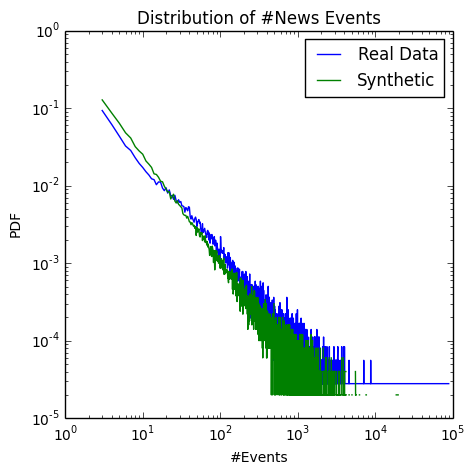

In [6]:
# the fitted distribution
def synthetic(degrees, f2):
    tmp = np.zeros(df.shape[0])
    for i in range(50000):
        deg = np.random.choice(degrees, p=f2)
        tmp[deg] += 1
    tmp = tmp / tmp.sum()
    return tmp

# the synthetic data generated by the Power-law
f3 = synthetic(df.index, df['f2'])
print "KS distance for synthetic sequence:", ksdistance(df["pdf4fit"], f3)

# plot the synthetic data
f, ax = plt.subplots(figsize=(5, 5))
ax.set(xscale="log", yscale="log")
line1, = ax.plot(df["bucket"], df["pdf4fit"], label="Real Data")
line2, = ax.plot(df["bucket"], f3, label="Synthetic")
ax.set_title('Distribution of #News Events')
ax.set_xlabel('#Events')
ax.set_ylabel('PDF')
plt.legend()
plt.savefig("./figures/synthetic.png")

In [10]:
# Now, we just need to repeat the above operations generating synthetic sequences
# and compute the KS distance for each synthetic sequence.
# The python code parallelized by joblib is provided in the repo.
# The following 2500 results are copied and pasted below.

In [7]:
ks_list = [0.15524577586688265, 0.16717801105589375, 0.1508885476576024, 0.16985537997654815, 0.14721363560221107, 0.16517801105589364, 0.1638621140208833, 0.15758949131721472, 0.16266211402088332, 0.15338668825730073, 0.16348854765760246, 0.169255379976548, 0.14608854765760226, 0.15205028756491146, 0.15613736110335602, 0.1613373611033559, 0.16773736110335585, 0.16398668825730078, 0.15966211402088354, 0.16907930091015694, 0.16228854765760226, 0.15966651404321824, 0.1602665140432185, 0.14687930091015694, 0.15066211402088353, 0.16968854765760233, 0.16751498129432102, 0.16606211402088328, 0.1627866882573008, 0.16666211402088332, 0.14567930091015718, 0.14858668825730081, 0.15522632196102526, 0.16998668825730057, 0.1608885476576024, 0.15705537997654834, 0.16218949131721477, 0.1601373611033559, 0.15185537997654813, 0.17046211402088346, 0.16757801105589348, 0.17218668825730077, 0.1717866882573006, 0.14651498129432133, 0.15425794851750535, 0.1603373611033559, 0.159479300910157, 0.14873736110335573, 0.15945794851750522, 0.15221363560221107, 0.1623780110558936, 0.15717801105589363, 0.161479300910157, 0.16218949131721477, 0.16173736110335585, 0.16508854765760228, 0.16351498129432124, 0.15565537997654838, 0.14405537997654821, 0.15573736110335584, 0.16466211402088332, 0.18058668825730073, 0.15658949131721472, 0.1598885476576024, 0.1538621140208835, 0.1630621140208835, 0.16373736110335585, 0.15868854765760232, 0.15944577586688252, 0.1629149812943212, 0.17413736110335581, 0.1572136356022113, 0.17326211402088326, 0.15148854765760233, 0.1646553799765484, 0.17285537997654826, 0.1557894913172148, 0.16598949131721502, 0.1582553799765481, 0.16386651404321845, 0.1609894913172149, 0.16046211402088334, 0.1505866882573007, 0.16412634987994856, 0.16553736110335587, 0.16671498129432155, 0.16338949131721509, 0.1627894913172147, 0.15028854765760224, 0.15926211402088358, 0.15493736110335604, 0.16358949131721473, 0.16093736110335582, 0.16253736110335598, 0.15958668825730082, 0.16106651404321864, 0.16081363560221112, 0.16385794851750518, 0.15178949131721492, 0.15278949131721492, 0.1591373611033559, 0.17158949131721485, 0.16181363560221113, 0.16148854765760234, 0.16298949131721502, 0.16466211402088354, 0.1619866882573009, 0.1568885476576023, 0.15848854765760245, 0.1561149812943214, 0.156479300910157, 0.1687866882573007, 0.15126211402088358, 0.15606211402088327, 0.16618949131721467, 0.16438668825730063, 0.1534579485175051, 0.15733736110335578, 0.15998668825730078, 0.15258949131721483, 0.16381363560221113, 0.1782553799765481, 0.1658621140208834, 0.1581373611033558, 0.15788854765760252, 0.1501373611033558, 0.15285794851750517, 0.16338668825730096, 0.16138949131721475, 0.16038668825730085, 0.15508854765760238, 0.1610621140208835, 0.17868854765760234, 0.1758621140208833, 0.16298668825730067, 0.15098668825730077, 0.16028854765760214, 0.15611498129432116, 0.16273736110335574, 0.17281363560221114, 0.1693385560332794, 0.15546211402088334, 0.1531373611033558, 0.16581363560221113, 0.1530885476576025, 0.16387930091015684, 0.16017801105589385, 0.15485537997654825, 0.15768854765760232, 0.15218949131721488, 0.16153736110335576, 0.14008854765760226, 0.14373736110335572, 0.1597866882573008, 0.16231498129432148, 0.14565537997654815, 0.16793736110335605, 0.14953736110335586, 0.16653736110335576, 0.17426211402088326, 0.16011498129432128, 0.15918949131721488, 0.1608502875649115, 0.16338668825730063, 0.15685537997654836, 0.1472665140432184, 0.16338949131721509, 0.1530621140208835, 0.1597866882573007, 0.15713736110335602, 0.15526211402088336, 0.16458949131721484, 0.1597866882573008, 0.15648854765760234, 0.16228854765760237, 0.16738668825730085, 0.15408854765760216, 0.15505537997654822, 0.17081363560221102, 0.1667866882573008, 0.1506885476576023, 0.1717149812943211, 0.1467894913172148, 0.15333736110335588, 0.16558949131721495, 0.14793855603327943, 0.15067930091015674, 0.168537361103356, 0.1599373611033557, 0.1662553799765482, 0.16518668825730076, 0.14905537997654822, 0.15625794851750535, 0.15918668825730087, 0.15748854765760212, 0.15753736110335587, 0.16033736110335567, 0.15246211402088344, 0.15098668825730088, 0.1698885476576023, 0.17238949131721498, 0.15897801105589376, 0.15505537997654834, 0.16573736110335574, 0.1743373611033558, 0.1619894913172148, 0.1589894913172148, 0.16398668825730078, 0.1700885476576024, 0.15831498129432114, 0.1606885476576022, 0.1783385560332793, 0.154279300910157, 0.16253736110335576, 0.15585537997654825, 0.15718668825730076, 0.15453736110335575, 0.16838668825730074, 0.15153736110335586, 0.16533736110335567, 0.14698949131721478, 0.15405028756491146, 0.15673736110335584, 0.1632793009101568, 0.15285537997654802, 0.1536621140208832, 0.15738949131721475, 0.15098668825730055, 0.1591373611033558, 0.1581373611033558, 0.16573736110335563, 0.15685028756491137, 0.16438668825730074, 0.16268854765760243, 0.1601373611033558, 0.1612665140432183, 0.1585780110558936, 0.1628885476576024, 0.15461363560221125, 0.165479300910157, 0.1659894913172149, 0.1702136356022111, 0.15273736110335584, 0.16377801105589357, 0.1457866882573008, 0.16058949131721473, 0.16298668825730067, 0.1537894913172148, 0.16358668825730083, 0.16287930091015695, 0.15945794851750522, 0.16298668825730078, 0.16878949131721482, 0.15631498129432125, 0.162013635602211, 0.16228854765760226, 0.16973736110335574, 0.17458668825730073, 0.16838949131721487, 0.16605794851750527, 0.1539894913172149, 0.16151498129432112, 0.16328854765760215, 0.1625780110558936, 0.16846211402088335, 0.16386211402088352, 0.15606211402088338, 0.1626621140208832, 0.16458949131721473, 0.1512553799765482, 0.1671894913172149, 0.15785537997654825, 0.15918949131721477, 0.14997801105589365, 0.16778949131721504, 0.15458949131721472, 0.16673736110335596, 0.15098018873192254, 0.1567866882573007, 0.1526502875649114, 0.1687866882573007, 0.15505794851750504, 0.16728854765760237, 0.16618949131721478, 0.15926211402088336, 0.16058949131721473, 0.16671498129432133, 0.16293736110335572, 0.15773736110335584, 0.16107930091015715, 0.14497801105589386, 0.14328854765760224, 0.15457801105589358, 0.1659894913172148, 0.14913736110335601, 0.1681373611033557, 0.1577866882573008, 0.165337361103356, 0.15171498129432154, 0.16671498129432144, 0.16565537997654828, 0.1542665140432184, 0.1583373611033559, 0.16126211402088325, 0.15498668825730078, 0.15868854765760232, 0.17265537997654828, 0.15453736110335586, 0.16157801105589348, 0.1701373611033558, 0.15378949131721492, 0.173337361103356, 0.15738949131721486, 0.15878018873192234, 0.16768854765760222, 0.16338949131721486, 0.16493736110335583, 0.16785537997654826, 0.16438949131721486, 0.16011498129432117, 0.1593373611033559, 0.15838949131721486, 0.15145537997654818, 0.16213736110335558, 0.15346651404321848, 0.17586211402088353, 0.14818668825730075, 0.1634553799765483, 0.1514579485175051, 0.15918949131721488, 0.16671498129432122, 0.15538668825730084, 0.16178949131721493, 0.15997801105589377, 0.15218949131721488, 0.16258668825730072, 0.1456621140208833, 0.1529894913172148, 0.16797801105589377, 0.16118668825730065, 0.17148854765760235, 0.16148854765760245, 0.1691894913172151, 0.16013736110335558, 0.16038668825730074, 0.16748854765760246, 0.16873736110335574, 0.15821363560221108, 0.14848854765760244, 0.1737780110558937, 0.165457948517505, 0.15626211402088358, 0.15558949131721472, 0.15738949131721475, 0.15973736110335585, 0.15418668825730086, 0.15318949131721477, 0.1624793009101569, 0.16806211402088328, 0.17386651404321868, 0.16185537997654825, 0.16668854765760233, 0.16838668825730063, 0.16638949131721464, 0.16128854765760237, 0.16278949131721504, 0.16398668825730067, 0.14917801105589373, 0.1647866882573007, 0.1589149812943213, 0.1591373611033558, 0.15177801105589356, 0.1526579485175052, 0.1535780110558937, 0.16333736110335567, 0.16173736110335585, 0.1608621140208833, 0.16458949131721484, 0.16246211402088334, 0.1754665140432184, 0.1679149812943213, 0.15397801105589376, 0.16366211402088332, 0.1615866882573006, 0.15865537997654816, 0.1561373611033557, 0.15566651404321857, 0.14818949131721498, 0.1635801887319226, 0.1674665140432185, 0.16658668825730083, 0.15938668825730073, 0.1578885476576023, 0.15985537997654803, 0.15888854765760252, 0.16708854765760217, 0.16965794851750543, 0.15718949131721488, 0.14548854765760244, 0.15658949131721484, 0.15673736110335573, 0.15973736110335574, 0.15753736110335576, 0.1587866882573008, 0.15173736110335573, 0.15331498129432136, 0.16658949131721484, 0.1552553799765482, 0.1571373611033558, 0.1465866882573007, 0.16581363560221102, 0.16038668825730074, 0.15233736110335577, 0.1545866882573007, 0.16006211402088338, 0.17346211402088335, 0.1511373611033558, 0.1671373611033557, 0.1514793009101572, 0.1729866882573009, 0.16828854765760248, 0.15218668825730075, 0.15566211402088342, 0.16048854765760234, 0.16448854765760224, 0.1541373611033558, 0.15718949131721488, 0.15265537997654838, 0.14973736110335584, 0.1405866882573007, 0.1638885476576022, 0.1632553799765481, 0.15418949131721466, 0.15417801105589363, 0.16761363560221104, 0.16571498129432133, 0.15368854765760243, 0.15973736110335562, 0.15745794851750522, 0.15926211402088336, 0.15685537997654803, 0.16277801105589368, 0.14978949131721492, 0.16065537997654816, 0.17058668825730072, 0.163189491317215, 0.16738668825730085, 0.15937801105589372, 0.1639149812943213, 0.15948854765760234, 0.1531373611033558, 0.1551373611033558, 0.16778949131721482, 0.1542553799765483, 0.1591373611033559, 0.17358949131721485, 0.1531894913172151, 0.16993736110335583, 0.14593855603327943, 0.16118949131721477, 0.1565780110558937, 0.15228854765760225, 0.15028854765760236, 0.15845537997654785, 0.16248854765760246, 0.1656621140208832, 0.1622665140432185, 0.16338949131721486, 0.1738621140208833, 0.1564793009101571, 0.15838949131721486, 0.16337801105589372, 0.1599894913172149, 0.15465537997654827, 0.15298949131721468, 0.1648621140208834, 0.15233736110335577, 0.15666651404321857, 0.14573736110335583, 0.1669894913172149, 0.15898668825730067, 0.15668854765760243, 0.16725794851750492, 0.16338949131721486, 0.16658949131721484, 0.16097801105589388, 0.15638949131721508, 0.16818668825730076, 0.15846211402088312, 0.16518018873192253, 0.1619894913172148, 0.160479300910157, 0.14405794851750514, 0.1673373611033558, 0.157986688257301, 0.15773736110335596, 0.16246211402088323, 0.16248854765760246, 0.14526211402088346, 0.1575866882573007, 0.16073736110335574, 0.16333736110335578, 0.15973736110335596, 0.15678949131721504, 0.16291498129432141, 0.17228854765760226, 0.16305537997654834, 0.16261363560221104, 0.15278668825730068, 0.16907930091015694, 0.1596579485175053, 0.1597780110558938, 0.15898668825730078, 0.16861363560221115, 0.158479300910157, 0.15438949131721486, 0.1427866882573008, 0.16518668825730087, 0.16658668825730083, 0.15818949131721488, 0.16238949131721475, 0.15338668825730084, 0.16313736110335592, 0.15758949131721472, 0.15917801105589352, 0.15145537997654818, 0.15438949131721452, 0.15073736110335595, 0.15677801105589378, 0.1571373611033559, 0.15773736110335573, 0.1618885476576023, 0.15846211402088345, 0.15397801105589387, 0.16737801105589384, 0.16193736110335571, 0.1568457758668826, 0.1687894913172146, 0.1589894913172148, 0.15817801105589374, 0.16693736110335594, 0.16491498129432153, 0.1613801887319225, 0.15506211402088327, 0.1609894913172148, 0.15948854765760223, 0.15468854765760254, 0.1583373611033559, 0.15258018873192247, 0.15797801105589354, 0.16838949131721498, 0.1594665140432185, 0.15748854765760234, 0.15358668825730082, 0.15638668825730073, 0.16518668825730076, 0.16198949131721468, 0.15331498129432136, 0.16178949131721482, 0.1641373611033557, 0.16866651404321847, 0.1573780110558936, 0.15048854765760233, 0.15453736110335575, 0.15026211402088357, 0.15338668825730073, 0.1611373611033558, 0.15046211402088322, 0.15065537997654815, 0.16007930091015693, 0.1625866882573006, 0.14678668825730068, 0.15465537997654816, 0.1646579485175051, 0.1647866882573008, 0.1626885476576021, 0.15498668825730078, 0.14085537997654812, 0.1690621140208835, 0.15738949131721486, 0.16486651404321867, 0.15808854765760216, 0.16258668825730072, 0.14713736110335568, 0.1641894913172149, 0.16097801105589366, 0.16211498129432106, 0.17178949131721505, 0.16225794851750502, 0.15758949131721461, 0.16038668825730096, 0.1527894913172147, 0.15653736110335575, 0.15973736110335585, 0.1668885476576023, 0.1638885476576024, 0.15045537997654806, 0.15818668825730076, 0.16318949131721477, 0.15577801105589356, 0.173457948517505, 0.15787930091015684, 0.15873855603327935, 0.17398949131721458, 0.15317801105589363, 0.15098668825730066, 0.1442665140432186, 0.1491385560332794, 0.1676579485175052, 0.1558885476576024, 0.15258949131721494, 0.17193736110335572, 0.15573736110335595, 0.1686621140208832, 0.15293855603327933, 0.16133736110335567, 0.16118949131721488, 0.15686651404321833, 0.15418668825730075, 0.1774793009101568, 0.16081363560221112, 0.15438949131721497, 0.15905537997654812, 0.16626211402088326, 0.1505894913172146, 0.16253736110335587, 0.16297801105589355, 0.16511498129432117, 0.16587930091015707, 0.1541894913172151, 0.16018949131721477, 0.16597801105589366, 0.15805794851750538, 0.1547866882573007, 0.16866211402088344, 0.1617866882573007, 0.15607930091015715, 0.1569373611033557, 0.17258949131721474, 0.16018668825730065, 0.15828854765760236, 0.14498668825730066, 0.15258949131721494, 0.16242632196102524, 0.1577866882573007, 0.1621373611033558, 0.16346211402088334, 0.1595866882573007, 0.16493736110335594, 0.16797801105589377, 0.16438668825730074, 0.16285794851750518, 0.16567930091015687, 0.1599373611033556, 0.15818949131721488, 0.15285537997654824, 0.1600621140208835, 0.1526885476576022, 0.1578621140208834, 0.16353736110335576, 0.16058949131721495, 0.15377801105589356, 0.16558668825730083, 0.1691373611033558, 0.15538668825730084, 0.1485780110558938, 0.15997801105589365, 0.15837801105589372, 0.14961363560221114, 0.15717801105589363, 0.1568885476576023, 0.1563780110558935, 0.15853736110335587, 0.1536579485175052, 0.1699866882573008, 0.16846211402088335, 0.16358949131721473, 0.15628854765760236, 0.16726211402088348, 0.1558502875649116, 0.15718668825730076, 0.1614665140432187, 0.15085794851750517, 0.15953736110335598, 0.15373736110335573, 0.15413736110335602, 0.16538949131721487, 0.15385537997654836, 0.1592136356022112, 0.15518949131721466, 0.16493736110335594, 0.17058668825730072, 0.17328854765760227, 0.15717801105589352, 0.15838949131721475, 0.1716579485175052, 0.15985537997654814, 0.1623373611033559, 0.165055379976548, 0.15577801105589367, 0.15766211402088331, 0.15548854765760223, 0.15887930091015673, 0.1599894913172148, 0.15558949131721495, 0.15293855603327933, 0.15718668825730076, 0.1517894913172148, 0.15698668825730078, 0.15625028756491144, 0.15761363560221103, 0.15793855603327933, 0.15724577586688243, 0.1621373611033558, 0.15718668825730076, 0.16626211402088337, 0.16698018873192255, 0.16581363560221113, 0.15927930091015702, 0.14425794851750512, 0.15998668825730078, 0.15533736110335566, 0.1535866882573007, 0.16446211402088334, 0.17058949131721474, 0.15766651404321858, 0.16573736110335585, 0.15488854765760252, 0.1605866882573007, 0.16093855603327922, 0.15138949131721474, 0.15251498129432134, 0.15626211402088325, 0.1673373611033559, 0.1623373611033559, 0.1657894913172146, 0.15118949131721487, 0.15048854765760222, 0.15707930091015693, 0.1531373611033558, 0.16501363560221122, 0.1733373611033559, 0.1608457758668826, 0.16838949131721498, 0.1583385560332793, 0.15578949131721492, 0.1530621140208835, 0.15697801105589376, 0.16007930091015704, 0.15718668825730064, 0.16878949131721493, 0.1588885476576023, 0.15313736110335613, 0.15546211402088334, 0.16893736110335572, 0.15453736110335564, 0.14485537997654813, 0.15026211402088357, 0.15858668825730082, 0.1643894913172152, 0.16131498129432137, 0.15505028756491146, 0.1581373611033559, 0.1563780110558936, 0.15411498129432116, 0.16111498129432106, 0.16908854765760228, 0.15439377966385603, 0.16278949131721493, 0.1600885476576025, 0.1734665140432185, 0.16317801105589363, 0.1658621140208833, 0.15077801105589356, 0.15873736110335585, 0.1508885476576024, 0.16245794851750522, 0.15993855603327922, 0.16625537997654843, 0.16718668825730076, 0.16508854765760228, 0.15357801105589358, 0.1578621140208834, 0.1528621140208835, 0.15697801105589354, 0.1639149812943213, 0.15758949131721472, 0.1508621140208834, 0.16768854765760244, 0.17438949131721465, 0.16245537997654808, 0.15773736110335584, 0.16478949131721482, 0.15161363560221114, 0.1576502875649114, 0.16406211402088328, 0.16505537997654812, 0.14641363560221116, 0.16261363560221126, 0.15808854765760239, 0.16528854765760237, 0.1661894913172149, 0.15348854765760223, 0.1599894913172148, 0.15378018873192245, 0.15998668825730078, 0.16317801105589363, 0.16158949131721473, 0.1608885476576022, 0.1640621140208834, 0.16005537997654823, 0.16144577586688252, 0.1599894913172148, 0.15913736110335558, 0.1561149812943215, 0.14878949131721503, 0.15898018873192243, 0.15558668825730082, 0.16518949131721478, 0.16608854765760228, 0.15081363560221112, 0.16005028756491135, 0.16548854765760235, 0.17025028756491134, 0.16165537997654794, 0.1515780110558937, 0.1613373611033559, 0.15658949131721495, 0.15918668825730065, 0.1563373611033559, 0.15768854765760232, 0.15951498129432123, 0.15453736110335586, 0.16737801105589362, 0.15748854765760245, 0.15392634987994847, 0.16411498129432117, 0.15944577586688252, 0.15817801105589363, 0.1569894913172148, 0.15497801105589376, 0.16665537997654817, 0.1532553799765481, 0.1681385560332792, 0.1530621140208835, 0.17007930091015694, 0.1708885476576023, 0.16038949131721497, 0.1655866882573006, 0.17978949131721494, 0.1559894913172148, 0.15058949131721472, 0.15778949131721481, 0.16217801105589363, 0.16111498129432128, 0.16051498129432112, 0.1538621140208834, 0.150457948517505, 0.149954212965548, 0.1573373611033559, 0.1655866882573006, 0.1558621140208833, 0.168189491317215, 0.1475866882573008, 0.14025794851750523, 0.15153855603327915, 0.15538949131721497, 0.14031498129432135, 0.1579894913172149, 0.1593780110558936, 0.15067930091015697, 0.1719866882573008, 0.1640885476576024, 0.16678949131721482, 0.1623373611033559, 0.1554665140432186, 0.14504577586688255, 0.15881363560221123, 0.1588885476576023, 0.15337801105589383, 0.16537801105589373, 0.16026211402088325, 0.157189491317215, 0.16993736110335583, 0.15633736110335578, 0.15465537997654794, 0.16758668825730083, 0.15058949131721516, 0.15377801105589356, 0.16638949131721475, 0.16838949131721487, 0.16411498129432117, 0.16545794851750523, 0.15273736110335584, 0.16297801105589377, 0.1693373611033559, 0.1628579485175053, 0.15978949131721493, 0.16048854765760234, 0.16378668825730058, 0.14085794851750505, 0.15433736110335589, 0.14498949131721478, 0.16831498129432126, 0.1610793009101567, 0.16846211402088335, 0.1653385560332794, 0.16725794851750514, 0.1565780110558937, 0.16481363560221113, 0.14586211402088328, 0.17425537997654844, 0.1600136356022111, 0.16307930091015704, 0.1602793009101568, 0.16438668825730085, 0.15153736110335586, 0.14941363560221105, 0.1579373611033557, 0.16377801105589368, 0.16593855603327923, 0.14878018873192256, 0.16001363560221132, 0.16058949131721473, 0.15815421296554777, 0.1656793009101571, 0.15126651404321861, 0.1535894913172146, 0.16058949131721473, 0.16598668825730079, 0.16128854765760225, 0.148426321961025, 0.16205794851750527, 0.1631373611033558, 0.16173736110335574, 0.15005537997654822, 0.17267930091015687, 0.16018668825730076, 0.16641363560221117, 0.15726211402088347, 0.15738668825730062, 0.1646502875649114, 0.14533736110335588, 0.16038949131721486, 0.15205537997654833, 0.1828579485175051, 0.16018668825730087, 0.15693736110335593, 0.1713385560332792, 0.16728854765760226, 0.16597801105589377, 0.1716621140208831, 0.15993736110335582, 0.1518621140208833, 0.1623373611033559, 0.15565794851750542, 0.15538668825730084, 0.16018668825730065, 0.16338949131721475, 0.16073736110335585, 0.16533855603327918, 0.1569149812943213, 0.16868854765760244, 0.1648579485175053, 0.16438949131721498, 0.16018668825730076, 0.1547894913172148, 0.17438668825730075, 0.15305537997654844, 0.16098949131721502, 0.1585866882573006, 0.14718949131721498, 0.15985537997654836, 0.1586885476576022, 0.17265537997654817, 0.16271498129432121, 0.16538949131721487, 0.14928854765760236, 0.1606502875649114, 0.16891498129432153, 0.15853736110335565, 0.16207930091015704, 0.16073736110335596, 0.15445794851750544, 0.1591373611033558, 0.15033736110335577, 0.15577801105589367, 0.16393736110335594, 0.1550621140208835, 0.16598668825730067, 0.16958668825730072, 0.16618949131721478, 0.1647866882573007, 0.16005028756491146, 0.16155421296554806, 0.15984577586688248, 0.15685794851750517, 0.16826211402088348, 0.1633373611033559, 0.1599373611033557, 0.16075421296554837, 0.16405794851750516, 0.16217801105589363, 0.16733736110335568, 0.1556579485175052, 0.15745537997654818, 0.16593736110335594, 0.1425894913172147, 0.15218668825730075, 0.17148854765760246, 0.14818949131721498, 0.15145794851750521, 0.1609894913172149, 0.14848854765760244, 0.15618668825730075, 0.1447894913172147, 0.1731373611033557, 0.17953736110335566, 0.1697866882573006, 0.16218668825730065, 0.16758949131721484, 0.15966211402088332, 0.16177801105589346, 0.16838949131721476, 0.16266651404321847, 0.15951498129432146, 0.16547930091015678, 0.1568885476576023, 0.1623373611033559, 0.15645537997654807, 0.16638668825730085, 0.1693373611033558, 0.16138668825730063, 0.1592665140432185, 0.16398668825730067, 0.1587780110558938, 0.15818668825730076, 0.155479300910157, 0.145337361103356, 0.17253736110335566, 0.16938668825730063, 0.1579149812943214, 0.1507866882573008, 0.1696457758668825, 0.1601373611033557, 0.15726211402088347, 0.17028854765760237, 0.15226211402088347, 0.16685537997654815, 0.1623780110558935, 0.14998949131721467, 0.15751498129432123, 0.15273736110335595, 0.14873736110335584, 0.1737780110558937, 0.16213736110335591, 0.155989491317215, 0.16018668825730065, 0.16225794851750525, 0.16087930091015706, 0.16766651404321858, 0.1677866882573007, 0.15118668825730064, 0.16673736110335585, 0.15726211402088347, 0.14833736110335588, 0.156989491317215, 0.16291498129432141, 0.16658668825730072, 0.1540885476576026, 0.1627780110558938, 0.15228854765760214, 0.14887930091015705, 0.15507930091015704, 0.15926211402088347, 0.15546211402088345, 0.14748854765760244, 0.16378949131721493, 0.16268854765760254, 0.15658949131721484, 0.15253855603327926, 0.16697801105589366, 0.16031498129432126, 0.16973736110335574, 0.16546211402088346, 0.15926211402088336, 0.15625794851750513, 0.16493736110335583, 0.15581363560221112, 0.15433736110335577, 0.15977801105589357, 0.16197801105589354, 0.15477801105589367, 0.15985537997654825, 0.15466211402088353, 0.16038668825730074, 0.15378668825730069, 0.15518668825730086, 0.15286651404321855, 0.16453736110335565, 0.1607149812943212, 0.16473736110335596, 0.1631373611033558, 0.15722632196102537, 0.15646211402088334, 0.15131498129432136, 0.15787930091015695, 0.16846211402088346, 0.16778949131721482, 0.15838949131721508, 0.16461363560221093, 0.15018668825730075, 0.16593736110335583, 0.16868854765760233, 0.15633736110335578, 0.147055379976548, 0.15318949131721488, 0.16578668825730059, 0.17473736110335597, 0.15058668825730082, 0.1605780110558936, 0.15938949131721464, 0.15878018873192257, 0.14918668825730064, 0.16693736110335583, 0.15513736110335602, 0.16953736110335577, 0.1576665140432187, 0.1655866882573006, 0.15318668825730064, 0.15753736110335553, 0.16338949131721453, 0.16553736110335576, 0.15178668825730068, 0.16108854765760228, 0.16668854765760233, 0.15493736110335593, 0.1569894913172149, 0.1565866882573007, 0.1623373611033559, 0.16453736110335587, 0.16286651404321867, 0.1628621140208833, 0.1638885476576022, 0.15373736110335573, 0.166255379976548, 0.16371498129432133, 0.17038949131721498, 0.1579149812943213, 0.1759149812943211, 0.15538668825730073, 0.15433736110335577, 0.15798668825730078, 0.15953736110335598, 0.1630621140208835, 0.16353736110335587, 0.16491498129432097, 0.16877801105589346, 0.14305794851750525, 0.14671498129432142, 0.16186211402088352, 0.14941363560221116, 0.17104577586688247, 0.16721363560221109, 0.16797801105589366, 0.15487930091015695, 0.16473736110335607, 0.14973736110335606, 0.16341363560221106, 0.1555780110558938, 0.16966211402088355, 0.16373736110335596, 0.16026211402088347, 0.15648854765760245, 0.1605780110558938, 0.16253736110335587, 0.16611498129432106, 0.16018949131721466, 0.1540136356022112, 0.16558668825730072, 0.15825794851750546, 0.16198668825730056, 0.16346211402088334, 0.1661373611033558, 0.1739894913172148, 0.16726651404321863, 0.15833736110335578, 0.16107930091015693, 0.14731498129432125, 0.15818668825730076, 0.14418668825730097, 0.15918668825730065, 0.15558949131721472, 0.15488854765760207, 0.15972634987994894, 0.1649894913172149, 0.17293736110335595, 0.1649149812943212, 0.17238949131721498, 0.15793736110335582, 0.16048854765760234, 0.15428854765760225, 0.15238668825730062, 0.17048854765760213, 0.16858949131721473, 0.1739149812943212, 0.16053736110335587, 0.15818668825730076, 0.16938949131721487, 0.16518668825730065, 0.15618668825730064, 0.16087930091015706, 0.1606665140432188, 0.16493736110335583, 0.15987930091015706, 0.15311498129432138, 0.15971498129432132, 0.16453736110335576, 0.1563780110558936, 0.15413736110335569, 0.15598668825730078, 0.16205794851750538, 0.15938949131721475, 0.1729866882573008, 0.1648885476576024, 0.15093736110335582, 0.15993736110335594, 0.15385794851750528, 0.16926211402088315, 0.17118949131721456, 0.14838668825730073, 0.1715866882573006, 0.15085028756491148, 0.16708854765760262, 0.16768854765760233, 0.164337361103356, 0.15398018873192232, 0.15825794851750502, 0.16286651404321845, 0.16438668825730074, 0.16505537997654812, 0.17131498129432127, 0.1601149812943214, 0.14906211402088348, 0.16648854765760224, 0.15918668825730087, 0.16351498129432124, 0.15758949131721495, 0.16533736110335567, 0.16245794851750534, 0.15798668825730078, 0.16758949131721473, 0.16285794851750507, 0.16073736110335574, 0.15911498129432117, 0.1595780110558937, 0.16758949131721473, 0.1661894913172149, 0.1588621140208833, 0.14726651404321872, 0.1710621140208835, 0.15817801105589374, 0.15938668825730085, 0.14958949131721494, 0.1675801887319227, 0.1456579485175053, 0.17353736110335588, 0.16198949131721468, 0.15708854765760227, 0.16487930091015707, 0.16918668825730077, 0.17358949131721507, 0.16473736110335574, 0.15688854765760218, 0.16068854765760243, 0.15438949131721497, 0.168337361103356, 0.16105537997654834, 0.15433736110335577, 0.15861363560221114, 0.16505028756491147, 0.156989491317215, 0.1533801887319226, 0.15653736110335587, 0.15618949131721455, 0.16698668825730079, 0.1558621140208835, 0.15188854765760262, 0.15368854765760231, 0.16218668825730076, 0.15793736110335604, 0.16017801105589374, 0.15826211402088325, 0.1617866882573007, 0.16113736110335602, 0.1685866882573006, 0.14818668825730064, 0.16213736110335591, 0.161189491317215, 0.15041363560221105, 0.173679300910157, 0.16168854765760232, 0.16191498129432141, 0.16773736110335585, 0.1618885476576023, 0.14833736110335577, 0.1649894913172148, 0.13738949131721473, 0.16028854765760225, 0.15485794851750528, 0.1717894913172146, 0.15278018873192256, 0.15926211402088325, 0.15905537997654823, 0.1568621140208834, 0.1679866882573008, 0.15628854765760236, 0.15871498129432132, 0.15631498129432125, 0.1595780110558937, 0.16093736110335594, 0.1588579485175053, 0.15633736110335578, 0.1632553799765481, 0.15799675023731108, 0.1609894913172149, 0.16738949131721476, 0.15466211402088342, 0.15667930091015697, 0.15408854765760238, 0.16573736110335585, 0.15706211402088338, 0.15805537997654812, 0.15918668825730065, 0.15805794851750515, 0.15058949131721505, 0.15733736110335567, 0.1685780110558937, 0.16407930091015727, 0.16727930091015702, 0.16818018873192253, 0.1549894913172148, 0.15985537997654836, 0.16628854765760226, 0.1517894913172147, 0.161337361103356, 0.1469894913172149, 0.1579373611033557, 0.15718949131721466, 0.16418949131721478, 0.16338949131721486, 0.16365537997654828, 0.1545866882573007, 0.15518018873192252, 0.1622553799765482, 0.16501363560221133, 0.17275421296554816, 0.15425794851750546, 0.16493736110335583, 0.15837801105589383, 0.1594579485175051, 0.1556579485175052, 0.15198668825730077, 0.15698668825730044, 0.14738949131721485, 0.15726651404321862, 0.14718668825730075, 0.16405028756491147, 0.1657866882573008, 0.14911498129432105, 0.1648621140208834, 0.16333736110335578, 0.15585537997654814, 0.16477801105589357, 0.15302632196102528, 0.15338949131721485, 0.16653736110335576, 0.17518668825730066, 0.1689866882573008, 0.17777801105589403, 0.16048854765760245, 0.15958668825730082, 0.16168854765760232, 0.16078949131721482, 0.15717801105589363, 0.1698885476576022, 0.15408854765760227, 0.15793736110335582, 0.15818668825730076, 0.16298668825730067, 0.1641373611033558, 0.16506211402088328, 0.17518949131721478, 0.16877801105589368, 0.16205028756491158, 0.1593780110558936, 0.15645537997654818, 0.14877801105589356, 0.1586579485175051, 0.15938668825730073, 0.1733373611033559, 0.16861363560221115, 0.15945794851750544, 0.1497866882573008, 0.15786211402088318, 0.15933736110335578, 0.15786651404321866, 0.16046211402088367, 0.17073736110335597, 0.16597801105589366, 0.15405794851750537, 0.15498949131721512, 0.16446211402088345, 0.1539149812943213, 0.16287930091015707, 0.15773855603327935, 0.1592553799765481, 0.16598949131721502, 0.16333736110335567, 0.16953736110335577, 0.17653736110335588, 0.16665537997654795, 0.15833736110335578, 0.1605780110558938, 0.16698949131721447, 0.15677801105589367, 0.15878949131721493, 0.1538621140208835, 0.14733736110335577, 0.15726211402088325, 0.16018668825730098, 0.16168854765760232, 0.15041363560221116, 0.1535780110558937, 0.1718885476576023, 0.15277801105589378, 0.16358668825730072, 0.1623373611033559, 0.15673736110335595, 0.1540429951421074, 0.16228854765760226, 0.15608854765760238, 0.1592665140432185, 0.1639866882573009, 0.158337361103356, 0.16358949131721473, 0.1631373611033557, 0.17058949131721463, 0.156189491317215, 0.1664553799765483, 0.163055379976548, 0.15498018873192265, 0.160813635602211, 0.1608885476576024, 0.16118668825730087, 0.15398668825730089, 0.16326211402088336, 0.14238949131721507, 0.15211498129432138, 0.1582553799765481, 0.16308854765760228, 0.1671149812943214, 0.16885537997654826, 0.17018949131721478, 0.1739894913172148, 0.16058668825730082, 0.16226211402088336, 0.1713373611033559, 0.1757866882573007, 0.15478949131721503, 0.1496621140208833, 0.16258949131721462, 0.1545866882573007, 0.15404577586688256, 0.1511149812943215, 0.16658668825730072, 0.15058018873192247, 0.1571149812943214, 0.16198949131721468, 0.15798018873192254, 0.15858949131721473, 0.16108854765760205, 0.16305794851750538, 0.16653736110335587, 0.17081363560221113, 0.1618621140208833, 0.15917801105589374, 0.1508885476576024, 0.16573736110335574, 0.16271498129432133, 0.16773736110335596, 0.15605537997654823, 0.16405028756491147, 0.1672553799765481, 0.152989491317215, 0.14958949131721505, 0.15284577586688247, 0.15205537997654822, 0.15793736110335593, 0.15978949131721482, 0.1527894913172147, 0.15797801105589376, 0.16678949131721493, 0.15665537997654816, 0.1665780110558937, 0.17805537997654836, 0.1651373611033558, 0.16505028756491136, 0.16293736110335572, 0.15678949131721492, 0.17498668825730068, 0.1660621140208836, 0.1677866882573008, 0.15807930091015704, 0.16293736110335605, 0.15488854765760218, 0.14961363560221103, 0.1777780110558937, 0.16637801105589362, 0.16558949131721462, 0.15361363560221103, 0.16438668825730074, 0.16958668825730083, 0.16431498129432137, 0.17506211402088329, 0.15528854765760247, 0.16646211402088346, 0.14885028756491137, 0.16758949131721484, 0.16688854765760242, 0.1527894913172148, 0.16978949131721505, 0.13898668825730087, 0.16173736110335585, 0.1613373611033559, 0.16005537997654812, 0.1656621140208832, 0.1557894913172147, 0.15538949131721497, 0.14478668825730068, 0.14928854765760236, 0.16961363560221115, 0.16571498129432122, 0.1558621140208835, 0.1577866882573007, 0.16593736110335583, 0.16318949131721477, 0.16845794851750534, 0.16411498129432117, 0.16473736110335585, 0.17478949131721505, 0.15061363560221114, 0.15658949131721484, 0.1618621140208834, 0.16313736110335558, 0.16598949131721502, 0.1709866882573009, 0.15233736110335555, 0.16858668825730072, 0.16706651404321832, 0.17173736110335586, 0.16451498129432135, 0.16418668825730065, 0.16587930091015696, 0.1549373611033557, 0.17378949131721472, 0.15798949131721501, 0.1417894913172149, 0.16108854765760228, 0.16098949131721502, 0.16258668825730072, 0.16428854765760237, 0.16253736110335576, 0.1571373611033558, 0.15057801105589358, 0.15204299514210762, 0.16598949131721502, 0.16546211402088357, 0.1730885476576023, 0.15177801105589378, 0.16058949131721495, 0.1591801887319224, 0.15825794851750513, 0.14965537997654804, 0.16731498129432137, 0.1481373611033558, 0.1635866882573006, 0.17227930091015703, 0.16031498129432126, 0.16098668825730067, 0.154989491317215, 0.15488854765760252, 0.16018949131721488, 0.1696665140432187, 0.15538668825730073, 0.16545537997654808, 0.14738949131721463, 0.15917801105589374, 0.1534553799765483, 0.16453736110335576, 0.16433736110335578, 0.1530793009101568, 0.15618668825730064, 0.15161363560221114, 0.15438668825730084, 0.15473736110335573, 0.1649894913172149, 0.14838949131721463, 0.16285537997654825, 0.15526211402088336, 0.14488854765760217, 0.15853736110335587, 0.16618668825730076, 0.15504577586688245, 0.1550136356022111, 0.15138949131721496, 0.16042632196102535, 0.1567866882573009, 0.16273736110335585, 0.16108854765760228, 0.16198018873192255, 0.16153736110335587, 0.152986688257301, 0.16505537997654812, 0.15966211402088343, 0.16098949131721502, 0.1535780110558937, 0.16238949131721464, 0.16278668825730058, 0.16668854765760233, 0.16266651404321858, 0.16918668825730065, 0.1567894913172148, 0.16067930091015697, 0.16973736110335574, 0.15813736110335602, 0.15948854765760223, 0.15906211402088338, 0.15778949131721481, 0.1493780110558937, 0.1652553799765482, 0.17451498129432114, 0.15493736110335604, 0.16613736110335592, 0.16826211402088326, 0.15698668825730067, 0.17058949131721485, 0.14945537997654829, 0.14365537997654837, 0.1479149812943213, 0.15918949131721477, 0.15218949131721465, 0.15225794851750502, 0.1615780110558938, 0.16458949131721484, 0.1643780110558935, 0.1538621140208834, 0.146989491317215, 0.16018949131721477, 0.1544793009101571, 0.15418949131721488, 0.1698621140208833, 0.17017801105589364, 0.15618668825730087, 0.15848854765760234, 0.1607780110558938, 0.17113736110335592, 0.17073736110335574, 0.15446211402088356, 0.1582553799765482, 0.16168854765760254, 0.15353736110335575, 0.15691498129432108, 0.17266211402088333, 0.1545894913172145, 0.1621373611033557, 0.14897801105589364, 0.15338668825730073, 0.15825537997654832, 0.16478949131721482, 0.1573373611033559, 0.1516579485175053, 0.15538668825730062, 0.1557894913172148, 0.15731498129432137, 0.16206211402088339, 0.16993736110335583, 0.16873736110335597, 0.1552553799765483, 0.15238668825730084, 0.1488621140208835, 0.16238668825730085, 0.15971498129432143, 0.16531498129432126, 0.15258949131721483, 0.1659894913172148, 0.15605537997654823, 0.1627866882573008, 0.16587930091015718, 0.16226211402088336, 0.16658949131721473, 0.15538949131721486, 0.1576553799765485, 0.16047930091015689, 0.15993736110335594, 0.16197801105589366, 0.1648885476576023, 0.16131498129432126, 0.16018949131721488, 0.14833736110335577, 0.14938949131721485, 0.15538668825730062, 0.15733736110335578, 0.15585537997654825, 0.15888854765760252, 0.16225028756491144, 0.16138668825730074, 0.1549866882573009, 0.16793736110335594, 0.15652634987994873, 0.1536579485175052, 0.1716665140432186, 0.16418668825730076, 0.15445537997654807, 0.16658668825730072, 0.16658668825730083, 0.15577801105589367, 0.15631498129432136, 0.16378949131721515, 0.1567894913172148, 0.16258949131721484, 0.15548854765760223, 0.16158949131721473, 0.14698668825730088, 0.16378949131721482, 0.15893736110335582, 0.1614579485175051, 0.14938949131721496, 0.16138949131721497, 0.15793736110335582, 0.16973736110335597, 0.1675780110558937, 0.15665537997654816, 0.15012634987994855, 0.17138668825730063, 0.15393736110335593, 0.16113736110335602, 0.16393736110335583, 0.17493736110335573, 0.17148854765760224, 0.157479300910157, 0.15598668825730067, 0.16511498129432128, 0.16625794851750525, 0.14438668825730072, 0.1586502875649114, 0.16178949131721493, 0.15018949131721498, 0.16331498129432126, 0.17778668825730082, 0.15848854765760245, 0.1639894913172147, 0.15353736110335597, 0.15273736110335584, 0.1605866882573007, 0.16578949131721482, 0.16398668825730067, 0.16442632196102547, 0.17273736110335597, 0.17037801105589362, 0.16731498129432115, 0.1525866882573007, 0.16248854765760246, 0.15338949131721474, 0.16807930091015694, 0.17153736110335588, 0.15947930091015688, 0.1677866882573007, 0.16827930091015703, 0.16165537997654827, 0.1671373611033556, 0.15921363560221108, 0.16566211402088332, 0.15773736110335584, 0.1615780110558936, 0.15698668825730067, 0.15924577586688254, 0.1630885476576024, 0.15637801105589372, 0.16718018873192264, 0.16631498129432137, 0.161055379976548, 0.1620621140208835, 0.1615780110558937, 0.1701894913172149, 0.1530136356022111, 0.15606651404321853, 0.1617866882573007, 0.15466211402088342, 0.16553736110335565, 0.15418668825730064, 0.1560136356022112, 0.14918668825730064, 0.1521373611033559, 0.1629894913172148, 0.15931498129432126, 0.15605794851750515, 0.16153736110335565, 0.16078949131721493, 0.15353736110335575, 0.1525780110558937, 0.1582793009101568, 0.15313736110335568, 0.16451498129432124, 0.16593736110335583, 0.15245537997654796, 0.15818668825730076, 0.16691498129432097, 0.1611385560332793, 0.1671373611033558, 0.15758668825730093, 0.17258668825730095, 0.16868854765760233, 0.15893736110335593, 0.1501373611033558, 0.17553736110335577, 0.15985794851750507, 0.16238949131721497, 0.15465537997654838, 0.14218668825730063, 0.16298018873192244, 0.1574553799765483, 0.16581363560221113, 0.16451498129432113, 0.1680621140208834, 0.17726211402088338, 0.16465794851750531, 0.16805537997654824, 0.1447894913172149, 0.14993736110335582, 0.1531373611033558, 0.16478949131721482, 0.16333736110335567, 0.15657801105589347, 0.1599149812943214, 0.16138668825730074, 0.16838949131721487, 0.16797801105589366, 0.16548854765760235, 0.15628854765760247, 0.16638949131721498, 0.16105537997654823, 0.15906211402088338, 0.1526579485175052, 0.1656553799765485, 0.1604553799765484, 0.15173736110335595, 0.16258949131721484, 0.15565537997654827, 0.16451498129432146, 0.15926651404321884, 0.17273736110335586, 0.16686651404321878, 0.1492553799765482, 0.1589894913172148, 0.1686621140208832, 0.15345794851750544, 0.15986211402088352, 0.15278949131721492, 0.17053736110335588, 0.15873736110335585, 0.16585794851750518, 0.1634793009101569, 0.15633855603327917, 0.15217801105589374, 0.16813736110335592, 0.14938949131721496, 0.163189491317215, 0.15818949131721477, 0.1500553799765481, 0.1670885476576024, 0.15025794851750524, 0.16353736110335587, 0.1596885476576022, 0.1738621140208833, 0.1608885476576023, 0.15778949131721481, 0.166055379976548, 0.15885794851750518, 0.1682553799765482, 0.1596579485175053, 0.1713373611033559, 0.14818668825730064, 0.15462632196102533, 0.1467149812943212, 0.16713736110335592, 0.15858949131721473, 0.15438949131721486, 0.16426211402088325, 0.15378949131721492, 0.15206651404321875, 0.15548854765760256, 0.1583780110558936, 0.16085537997654825, 0.1659894913172148, 0.15068854765760242, 0.1567149812943212, 0.1613373611033559, 0.15258018873192258, 0.16881363560221113, 0.16313736110335592, 0.15886651404321867, 0.15945537997654796, 0.14418949131721476, 0.16828854765760215, 0.16538668825730085, 0.1595780110558937, 0.15808854765760216, 0.17058949131721496, 0.155189491317215, 0.16773736110335585, 0.15308854765760227, 0.16213736110335591, 0.15618949131721488, 0.1678885476576023, 0.14893736110335593, 0.15238949131721474, 0.15838668825730073, 0.15506211402088338, 0.15338668825730062, 0.16018949131721477, 0.15666651404321835, 0.15793736110335582, 0.1647866882573007, 0.1628885476576024, 0.15277801105589345, 0.16608854765760228, 0.17353736110335588, 0.1520553799765481, 0.1568885476576024, 0.1568885476576024, 0.16307930091015704, 0.15718949131721488, 0.15573736110335584, 0.15818668825730064, 0.15953736110335587, 0.15965537997654805, 0.16873736110335563, 0.14818668825730086, 0.15308854765760238, 0.1681894913172149, 0.15973736110335596, 0.15948854765760234, 0.1569373611033557, 0.16457801105589392, 0.14707930091015703, 0.15278949131721492, 0.15578949131721492, 0.16373736110335585, 0.1529373611033557, 0.1671373611033557, 0.15595421296554857, 0.16006211402088327, 0.1647866882573007, 0.16953736110335588, 0.16578949131721493, 0.15873736110335573, 0.15553736110335586, 0.15038949131721485, 0.1602553799765482, 0.1598885476576024, 0.1501149812943215, 0.15966211402088332, 0.1560793009101567, 0.1586457758668825, 0.17353736110335588, 0.1608621140208833, 0.17258668825730084, 0.14953736110335586, 0.1527894913172148, 0.17328854765760215, 0.14208854765760248, 0.15498668825730066, 0.15567930091015708, 0.1570621140208835, 0.15846211402088334, 0.14868854765760253, 0.16668854765760233, 0.1609866882573009, 0.1671373611033557, 0.17125794851750503, 0.16071498129432132, 0.15233736110335577, 0.16093736110335582, 0.16373736110335574, 0.1479373611033558, 0.1506457758668826, 0.15746211402088334, 0.1660621140208835, 0.16638949131721475, 0.15437801105589383, 0.16068854765760232, 0.16938668825730085, 0.149989491317215, 0.16897801105589366, 0.1502553799765482, 0.15373736110335562, 0.16518668825730076, 0.16313736110335592, 0.1569373611033557, 0.16333736110335578, 0.1644553799765483, 0.15718949131721477, 0.1644553799765482, 0.16318949131721466, 0.1579149812943212, 0.148055379976548, 0.16398668825730078, 0.16093736110335582, 0.15333736110335577, 0.1558885476576023, 0.1512553799765482, 0.16497801105589366, 0.1631149812943214, 0.15145537997654818, 0.17031498129432127, 0.16518668825730087, 0.1563373611033559, 0.15731498129432125, 0.17238949131721487, 0.16138668825730063, 0.1570136356022112, 0.1603385560332793, 0.15833736110335578, 0.17058949131721496, 0.16078949131721515, 0.1477866882573008, 0.15965537997654816, 0.1625373611033561, 0.15658949131721472, 0.14833736110335577, 0.17138668825730086, 0.15044577586688251, 0.16118668825730076, 0.163337361103356, 0.16538668825730085, 0.16978668825730092, 0.1697866882573007, 0.1691373611033558, 0.1557866882573008, 0.16793736110335605, 0.1581373611033558, 0.15425537997654842, 0.16033736110335578, 0.16966211402088333, 0.1624579485175051, 0.15746211402088345, 0.16178949131721482, 0.1476263219610252, 0.1561373611033558, 0.14938668825730061, 0.16185794851750496, 0.14292634987994857, 0.1598621140208833, 0.1555780110558937, 0.1661894913172149, 0.16667930091015698, 0.16368854765760255, 0.16058949131721484, 0.15826211402088347, 0.14885537997654824, 0.16611498129432106, 0.15777801105589367, 0.16985537997654815, 0.16937801105589362, 0.16978949131721494, 0.15797801105589354, 0.16093736110335594, 0.17077801105589357, 0.16117801105589386, 0.16187930091015706, 0.16168854765760232, 0.16378668825730058, 0.16031498129432137, 0.1749894913172148, 0.15931498129432126, 0.16438949131721486, 0.15458668825730082, 0.1549894913172148, 0.14938949131721507, 0.15065537997654793, 0.1573385560332793, 0.1546885476576021, 0.15538949131721486, 0.15798949131721457, 0.16773736110335585, 0.15518949131721477, 0.16918949131721467, 0.1673385560332793, 0.1626885476576022, 0.15486651404321866, 0.15838949131721475, 0.1691373611033557, 0.16645537997654808, 0.15158949131721472, 0.16066651404321836, 0.16593736110335594, 0.16005537997654823, 0.15966651404321858, 0.16228854765760237, 0.16446211402088334, 0.16758949131721518, 0.1589894913172149, 0.17111498129432118, 0.15665794851750509, 0.1579373611033557, 0.14825794851750546, 0.15118949131721499, 0.1554553799765483, 0.15777801105589367, 0.15817801105589374, 0.16138949131721486, 0.16148854765760234, 0.15661363560221125, 0.1620136356022111, 0.16411498129432128, 0.1558621140208833, 0.16745794851750523, 0.15605537997654823, 0.15758949131721506, 0.15877801105589368, 0.1638885476576022, 0.15038668825730073, 0.158055379976548, 0.16278949131721482, 0.1525780110558937, 0.15933736110335578, 0.15608854765760227, 0.15933736110335578, 0.16028854765760236, 0.16973736110335585, 0.15498668825730078, 0.15606211402088338, 0.153189491317215, 0.15118949131721487, 0.1654553799765483, 0.14625537997654808, 0.15985794851750507, 0.1511373611033558, 0.1638885476576024, 0.16158949131721473, 0.15473736110335573, 0.16578949131721482, 0.14993736110335593, 0.17386211402088353, 0.16208854765760217, 0.16138668825730074, 0.16187930091015684, 0.14558668825730092, 0.1599894913172148, 0.1589866882573009, 0.15198668825730055, 0.1613780110558936, 0.16668854765760255, 0.15525794851750535, 0.1582793009101568, 0.15138949131721485, 0.1735373611033561, 0.17466651404321848, 0.15333736110335588, 0.15931498129432126, 0.1647780110558939, 0.1541373611033559, 0.15405794851750526, 0.1613780110558935, 0.16478949131721515, 0.16465537997654806, 0.1689894913172148, 0.1637894913172146, 0.15918668825730076, 0.1657894913172147, 0.16478949131721493, 0.15473736110335595, 0.15698668825730067, 0.16917801105589364, 0.14841363560221116, 0.16038668825730074, 0.16453736110335576, 0.1558885476576023, 0.15484577586688247, 0.16377801105589368, 0.14833736110335588, 0.14813736110335568, 0.16558949131721484, 0.1691373611033558, 0.1517263498799486, 0.1639373611033556, 0.15738949131721475, 0.16228854765760214, 0.16748854765760246, 0.1540621140208835, 0.14765537997654826, 0.16746211402088323, 0.16465794851750498, 0.15378018873192234, 0.1557894913172147, 0.1704665140432184, 0.17018949131721467, 0.16508854765760228, 0.15453736110335575, 0.16466211402088332, 0.16218949131721466, 0.15768854765760243, 0.17117801105589364, 0.16985537997654837, 0.15478949131721492, 0.1617866882573008, 0.15605794851750537, 0.16973736110335574, 0.15764299514210756, 0.15786211402088318, 0.1592793009101568, 0.15618949131721477, 0.15141363560221116, 0.15817801105589352, 0.1779866882573008, 0.16217801105589363, 0.15138668825730084, 0.14765537997654793, 0.17066211402088344, 0.16738668825730074, 0.15951498129432135, 0.15438949131721486, 0.15928854765760236, 0.15553736110335575, 0.15793736110335582, 0.17178668825730048, 0.14648854765760222, 0.16613736110335592, 0.16045537997654818, 0.16526211402088303, 0.15298668825730066, 0.1547894913172148, 0.17018949131721478, 0.15125794851750513, 0.1490553799765481, 0.16973736110335585, 0.16233736110335578, 0.1508885476576024, 0.14846211402088344, 0.1644793009101571, 0.17068854765760233, 0.16233736110335578, 0.1527149812943212, 0.1510621140208836, 0.1676885476576021, 0.15452634987994884, 0.15138949131721496, 0.1505866882573007, 0.15618949131721488, 0.1630885476576026, 0.16338668825730085, 0.15868854765760254, 0.15126211402088324, 0.1563373611033559, 0.16025028756491144, 0.15798668825730078, 0.17725794851750537, 0.16318949131721489, 0.156189491317215, 0.15217801105589374, 0.17438949131721476, 0.15428854765760225, 0.1554553799765483, 0.15841363560221117, 0.16361363560221126, 0.15878018873192257, 0.15305537997654833, 0.1570885476576025, 0.16773855603327925, 0.1531373611033558, 0.16005794851750538, 0.1590621140208835, 0.15078018873192267, 0.14853736110335597, 0.15458949131721494, 0.15071498129432143, 0.16044577586688263, 0.16198668825730078, 0.16206651404321876, 0.1601894913172151, 0.16438668825730085, 0.15298668825730066, 0.15573736110335584, 0.15798668825730067, 0.16493855603327934, 0.1585866882573005, 0.15618668825730064, 0.15605028756491146, 0.15272634987994882, 0.15118668825730075, 0.1561373611033558, 0.17798668825730068, 0.15718949131721477, 0.15258018873192236, 0.15945537997654807, 0.16108854765760228, 0.1700136356022111, 0.17318949131721478, 0.16418668825730076, 0.16473736110335585, 0.1581373611033558, 0.15666211402088343, 0.16458949131721484, 0.16006651404321842, 0.15426211402088336, 0.15505537997654822, 0.15038949131721496, 0.1589894913172149, 0.1550553799765481, 0.15605028756491146, 0.16397801105589355, 0.15838668825730096, 0.1534793009101571, 0.15785794851750518, 0.1539385560332791, 0.15804577586688257, 0.16573736110335574, 0.16353736110335587, 0.1518885476576025, 0.1563866882573005, 0.16313736110335592, 0.16353736110335598, 0.15938668825730062, 0.15967930091015686, 0.15958949131721473, 0.1547894913172147, 0.15705537997654812, 0.16066211402088332, 0.1598263219610253, 0.16758949131721496, 0.15273736110335573, 0.1636621140208832, 0.15651498129432112, 0.15805537997654834, 0.15405794851750537, 0.15605794851750515, 0.15645794851750544, 0.14812634987994866, 0.16598668825730067, 0.15548854765760245, 0.1621894913172151, 0.15725794851750535, 0.15553736110335598, 0.1587894913172147, 0.1667149812943211, 0.16186211402088363, 0.15753736110335587, 0.16053736110335587, 0.1579894913172149, 0.1678621140208832, 0.172714981294321, 0.1647866882573007, 0.15628854765760225, 0.15887930091015706, 0.16358668825730072, 0.16705537997654812, 0.15573736110335595, 0.16138668825730074, 0.15605794851750515, 0.1681894913172149, 0.15458949131721506, 0.16258949131721462, 0.16378949131721482, 0.16238949131721486, 0.1686579485175051, 0.1622553799765481, 0.17051498129432147, 0.15668854765760254, 0.16548854765760235, 0.1723373611033559, 0.16166651404321858, 0.1689894913172149, 0.153189491317215, 0.1607866882573008, 0.15827930091015702, 0.16258949131721473, 0.16948854765760235, 0.16017801105589374, 0.1639894913172148, 0.16148854765760223, 0.15461363560221114, 0.15953736110335587, 0.16441363560221106, 0.15768854765760243, 0.16173736110335585, 0.15966211402088343, 0.16221363560221097, 0.16138949131721497, 0.16738018873192262, 0.16028854765760236, 0.1459373611033558, 0.16638949131721475, 0.1538885476576023, 0.14917801105589362, 0.15581363560221112, 0.1567149812943212, 0.15958949131721495, 0.16578949131721482, 0.15677801105589356, 0.1581373611033558, 0.16968854765760233, 0.17398668825730068, 0.16608854765760228, 0.15704577586688256, 0.16098949131721502, 0.15311498129432127, 0.16837801105589362, 0.16206211402088316, 0.15953736110335576, 0.16393736110335583, 0.1563373611033559, 0.148514981294321, 0.16118668825730087, 0.16071498129432144, 0.14407930091015703, 0.15861363560221103, 0.15533736110335578, 0.16148854765760234, 0.16198949131721502, 0.1528885476576024, 0.15407930091015692, 0.16491498129432108, 0.17398949131721503, 0.17438949131721476, 0.15226651404321873, 0.16265537997654783, 0.1627894913172147, 0.15905794851750504, 0.16478018873192257, 0.16405537997654823, 0.16133736110335567, 0.16161363560221115, 0.16426211402088337, 0.17587930091015697, 0.16848854765760224, 0.1565866882573007, 0.1529801887319222, 0.1696793009101571, 0.17438949131721487, 0.15346211402088344, 0.15338949131721508, 0.15741363560221117, 0.14948854765760233, 0.16628854765760237, 0.1599894913172148, 0.15825794851750513, 0.14838949131721485, 0.15233736110335566, 0.16125794851750536, 0.15197801105589354, 0.15438949131721486, 0.15693736110335593, 0.15687930091015695, 0.14508854765760237, 0.15497801105589376, 0.15893736110335582, 0.1607866882573008, 0.1648885476576024, 0.16858949131721496, 0.16948854765760235, 0.1573373611033559, 0.16765794851750532, 0.16078949131721482, 0.1585780110558936, 0.15487930091015695, 0.16653855603327938, 0.1653373611033559, 0.14906211402088348, 0.16193736110335594, 0.15107930091015692, 0.17017801105589364, 0.16926211402088337, 0.16961363560221115, 0.16718018873192253, 0.15231498129432125, 0.15645537997654807, 0.1587894913172147, 0.14861363560221114, 0.157337361103356, 0.16058949131721495, 0.17438949131721487, 0.15185794851750528, 0.15993736110335594, 0.16577801105589357, 0.16137801105589372, 0.16305537997654823, 0.15913736110335602, 0.16646211402088346, 0.16688854765760242]

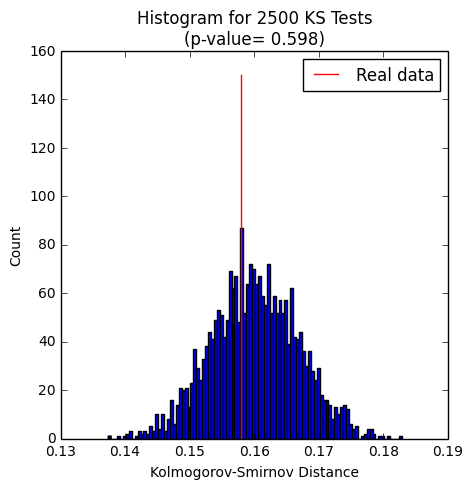

In [8]:
# the p-value simply P[ks1>ks2] 
# where ks1 is the KS distance of the real data and ks2 are those of synthetic data

# plot the synthetic data
f, ax = plt.subplots(figsize=(5, 5))
ax.hist(ks_list,bins=100)
ax.set_title('Histogram for 2500 KS Tests \n(p-value= 0.598)')
ax.set_xlabel('Kolmogorov-Smirnov Distance')
ax.set_ylabel('Count')

plt.plot((0.158, 0.158), (0, 150), 'r-', label="Real data")

plt.legend()
plt.savefig("./figures/pvalue.png")

In [9]:
# compute the p-value, if >0.1, then power-law is a plausible fit to the data
ks = np.array(ks_list)
# 0.158214173194 is the KS distance for real data
print "p-value=", 1.0 * sum(ks > 0.158214173194) / len(ks)

p-value= 0.598
